In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
from impala.dbapi import connect
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',1000)
from matplotlib.font_manager import FontProperties
chinese = FontProperties(fname = 'C:/Windows/Fonts/msyh.ttc')
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("D:/GitHub/datasets/shop_order_190101_190731.csv")

In [4]:
order_date_min = df.groupby('user_id').create_date.min()
order_date_min = pd.to_datetime(order_date_min)
order_date_max = df.groupby('user_id').create_date.max()
order_date_max = pd.to_datetime(order_date_max)

In [11]:
user_purchase_retention = pd.merge(left = df, 
                                   right = order_date_min.reset_index(), 
                                   how = 'inner', 
                                   on = 'user_id', 
                                   suffixes=('', '_min'))


In [13]:
user_purchase_retention["create_date"] = pd.to_datetime(user_purchase_retention["create_date"])

In [15]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.create_date - user_purchase_retention.create_date_min
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D'))

In [20]:
bin = [0,30,60,90,120,150,180]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)
user_purchase_retention.head(20)

,user_id,create_date,payable_rmb_amount,buy_num,date,month,create_date_min,order_date_diff,date_diff,date_diff_bin
0,2227633,2019-01-01 06:45:46,7.00,1.0,2019-01-01,2019-01-01,2019-01-01 06:45:46,0 days 00:00:00,0.000000,NaN
1,99,2019-01-01 08:35:27,17.00,1.0,2019-01-01,2019-01-01,2019-01-01 08:35:27,0 days 00:00:00,0.000000,NaN
2,99,2019-01-22 09:04:57,0.45,1.0,2019-01-22,2019-01-01,2019-01-01 08:35:27,21 days 00:29:30,21.020486,"(0, 30]"
3,2436006,2019-01-01 09:10:40,7.00,1.0,2019-01-01,2019-01-01,2019-01-01 09:10:40,0 days 00:00:00,0.000000,NaN
4,2436006,2019-02-11 19:04:48,7.00,1.0,2019-02-11,2019-02-01,2019-01-01 09:10:40,41 days 09:54:08,41.412593,"(30, 60]"
5,2436006,2019-03-22 00:06:21,5.99,1.0,2019-03-22,2019-03-01,2019-01-01 09:10:40,79 days 14:55:41,79.622002,"(60, 90]"
6,2436006,2019-03-13 23:08:16,5.99,1.0,2019-03-13,2019-03-01,2019-01-01 09:10:40,71 days 13:57:36,71.581667,"(60, 90]"
7,9473330,2019-01-01 11:11:21,7.00,1.0,2019-01-01,2019-01-01,2019-01-01 11:11:21,0 days 00:00:00,0.000000,NaN
8,9473330,2019-01-19 19:01:50,7.00,1.0,2019-01-19,2019-01-01,2019-01-01 11:11:21,18 days 07:50:29,18.326725,"(0, 30]"
9,8664508,2019-01-01 11:49:55,7.00,1.0,2019-01-01,2019-01-01,2019-01-01 11:49:55,0 days 00:00:00,0.000000,NaN


In [21]:
pivoted_retention= user_purchase_retention.groupby(['user_id','date_diff_bin']).payable_rmb_amount.sum().unstack()
pivoted_retention2= user_purchase_retention.groupby(['user_id','date_diff_bin']).buy_num.sum().unstack()


Text(0.5, 1.0, '各时间段的用户留存率')

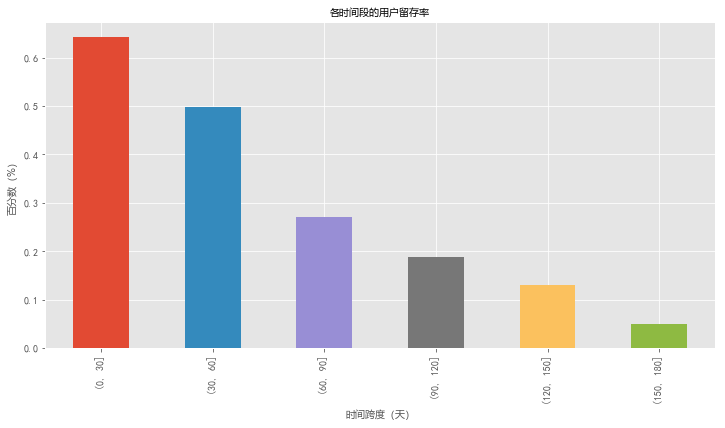

In [22]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x >0 else 0)
ax = (pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar(figsize = (12,6))
ax.set_xlabel('时间跨度（天）', fontproperties=chinese) 
ax.set_ylabel('百分数（%）', fontproperties=chinese) 
ax.set_title('各时间段的用户留存率', fontproperties=chinese)

In [23]:
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    return d

In [25]:
user_purchase_retention["order_date_diff"][0:20].sort_values()

0     0 days 00:00:00
16    0 days 00:00:00
15    0 days 00:00:00
14    0 days 00:00:00
12    0 days 00:00:00
11    0 days 00:00:00
10    0 days 00:00:00
18    0 days 00:00:00
9     0 days 00:00:00
7     0 days 00:00:00
3     0 days 00:00:00
1     0 days 00:00:00
8    18 days 07:50:29
2    21 days 00:29:30
17   41 days 00:30:57
4    41 days 09:54:08
13   47 days 22:19:35
19   51 days 23:21:07
6    71 days 13:57:36
5    79 days 14:55:41
Name: order_date_diff, dtype: timedelta64[ns]